# Importing libraries


In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Importing dataset

In [2]:
dataset = pd.read_csv('diabetes_dataset.csv')

# Preview Data

In [3]:
dataset.head()

,Pregnancies,Glucose_level,Blood_Pressure,thickness_of_skin,Insulin,body_mass_index,diabetes_pedigree_function,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
dataset.shape

(770, 9)

dataset.describe().T

In [7]:
dataset.isnull().sum()

Pregnancies                   0
Glucose_level                 0
Blood_Pressure                0
thickness_of_skin             0
Insulin                       0
body_mass_index               0
diabetes_pedigree_function    0
Age                           0
Outcome                       0
dtype: int64

# Observations:
1. There are a total 770 records and 9 features in our dataset.
2. Each feature can be either of integer or float dataype.
3. Some features like Glucose, Blood pressure , Insulin, BMI have zero values which represent data is missing.
4. There are zero NaN values in the dataset.
5. In the outcome column, 1 represents diabetes positive and 0 represents diabetes negative.


# Data Visualisation

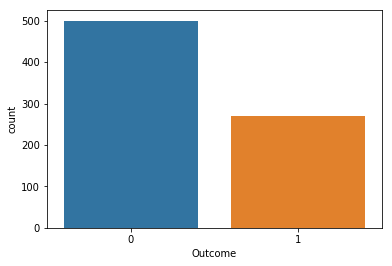

In [8]:
sns.countplot(x = 'Outcome',data = dataset)

### Histogram of each feature

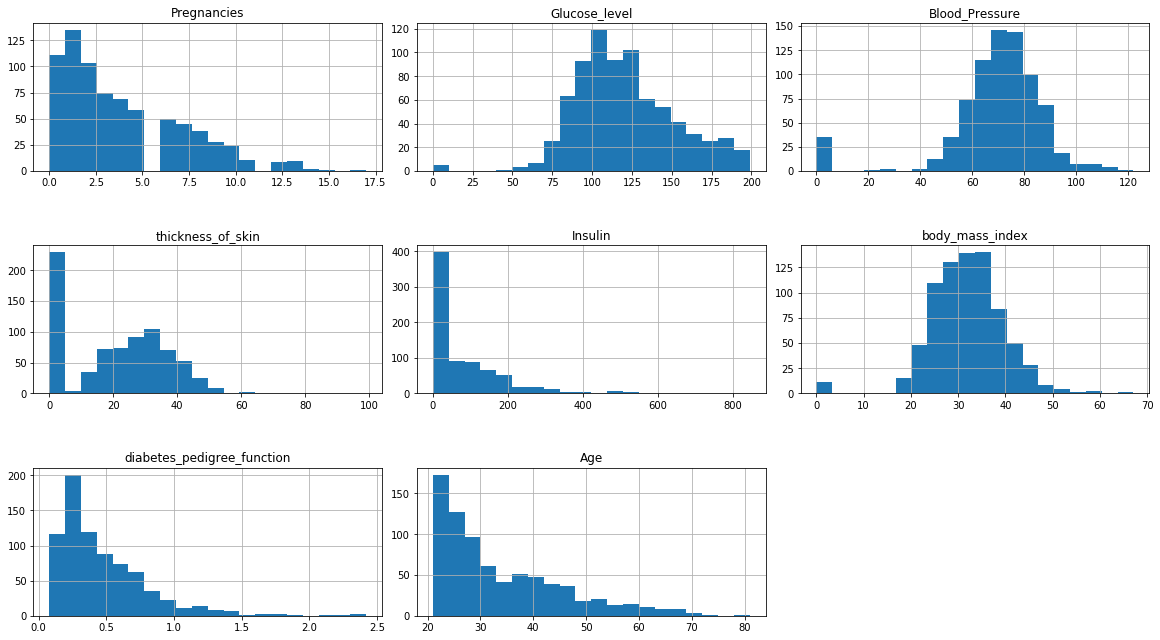

In [9]:
import itertools
col = dataset.columns[:8]
plt.subplots(figsize = (20, 15))
length = len(col)
for i, j in itertools.zip_longest(col, range(length)):
    plt.subplot((length/2), 3, j + 1)
    plt.subplots_adjust(wspace = 0.1,hspace = 0.5)
    dataset[i].hist(bins = 20)
    plt.title(i)
plt.show()

### Heat Map

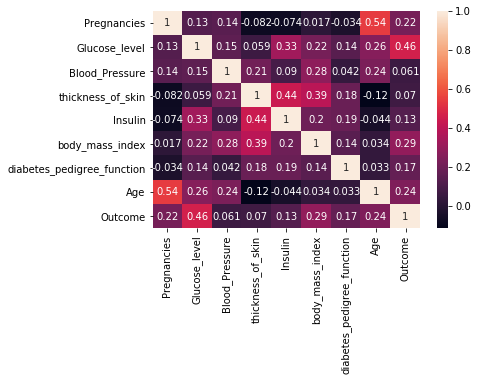

In [10]:
sns.heatmap(dataset.corr(), annot = True)
plt.show()

# Data Pre-processing

In [11]:
new_dataset = dataset

In [14]:
new_dataset[["Glucose_level", "Blood_Pressure", "thickness_of_skin", "Insulin", "body_mass_index"]] = new_dataset[["Glucose_level", "Blood_Pressure", "thickness_of_skin", "Insulin", "body_mass_index"]].replace(0, np.NaN) 

In [16]:
new_dataset.isnull().sum()

Pregnancies                     0
Glucose_level                   5
Blood_Pressure                 35
thickness_of_skin             229
Insulin                       376
body_mass_index                11
diabetes_pedigree_function      0
Age                             0
Outcome                         0
dtype: int64

In [17]:
new_dataset["Glucose_level"].fillna(new_dataset["Glucose_level"].mean(), inplace = True)
new_dataset["Blood_Pressure"].fillna(new_dataset["Blood_Pressure"].mean(), inplace = True)
new_dataset["thickness_of_skin"].fillna(new_dataset["thickness_of_skin"].mean(), inplace = True)
new_dataset["Insulin"].fillna(new_dataset["Insulin"].mean(), inplace = True)
new_dataset["body_mass_index"].fillna(new_dataset["body_mass_index"].mean(), inplace = True)

In [18]:
new_dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,770.0,3.846753,3.365455,0.000,1.000,3.000000,6.000000,17.00
Glucose_level,770.0,121.637908,30.411284,44.000,100.000,117.000000,140.000000,199.00
Blood_Pressure,770.0,72.345578,12.135249,24.000,64.000,72.000000,80.000000,122.00
thickness_of_skin,770.0,29.153420,8.779503,7.000,25.000,29.153420,32.000000,99.00
Insulin,770.0,155.548223,84.910475,14.000,122.000,155.548223,155.548223,846.00
body_mass_index,770.0,32.441238,6.878091,18.200,27.500,32.400000,36.575000,67.10
diabetes_pedigree_function,770.0,0.471606,0.330947,0.078,0.244,0.372500,0.625500,2.42
Age,770.0,33.274026,11.763003,21.000,24.000,29.000000,41.000000,81.00
Outcome,770.0,0.350649,0.477483,0.000,0.000,0.000000,1.000000,1.00


In [19]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
dataset_scaled = sc.fit_transform(new_dataset)

In [20]:
dataset_scaled = pd.DataFrame(dataset_scaled)

In [21]:
X = dataset_scaled.iloc[:, [1, 4, 5, 7]].values
Y = dataset_scaled.iloc[:, 8].values

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 42, stratify = new_dataset['Outcome'] )

In [24]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Y_train shape:", Y_train.shape)
print("Y_test shape:", Y_test.shape)

X_train shape: (616, 4)
X_test shape: (154, 4)
Y_train shape: (616,)
Y_test shape: (154,)


# Data modeling

## Logistic regression algorithm 

In [25]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(random_state = 42)
logreg.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=42, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

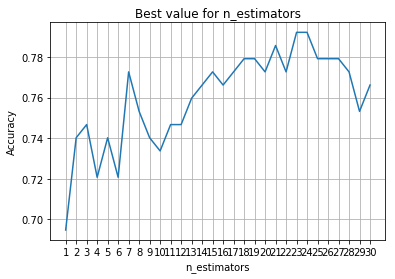

Highest value is given by ->  0.7922077922077922


In [27]:
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
X_axis = list(range(1, 31))
acc = pd.Series()
x = range(1,31)

for i in list(range(1, 31)):
    knn_model = KNeighborsClassifier(n_neighbors = i) 
    knn_model.fit(X_train, Y_train)
    prediction = knn_model.predict(X_test)
    acc = acc.append(pd.Series(metrics.accuracy_score(prediction, Y_test)))
plt.plot(X_axis, acc)
plt.xticks(x)
plt.title("Best value for n_estimators")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.grid()
plt.show()
print('Highest value is given by -> ',acc.values.max())

## K-nearest neighbour algorithm

In [28]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 24, metric = 'minkowski', p = 2)
knn.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=24, p=2,
                     weights='uniform')

## Vector classifier algorithm

In [29]:
from sklearn.svm import SVC
svc = SVC(kernel = 'linear', random_state = 42)
svc.fit(X_train, Y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=42,
    shrinking=True, tol=0.001, verbose=False)

## Naive Bayes algorithm

In [30]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, Y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

## Decision tree algorithm

In [31]:
from sklearn.tree import DecisionTreeClassifier
dectree = DecisionTreeClassifier(criterion = 'entropy', random_state = 42)
dectree.fit(X_train, Y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=42, splitter='best')

## Random Forest algorithm

In [32]:
from sklearn.ensemble import RandomForestClassifier
ranfor = RandomForestClassifier(n_estimators = 11, criterion = 'entropy', random_state = 42)
ranfor.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=11,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

### Predictions on dataset

In [33]:
Y_pred_logreg = logreg.predict(X_test)
Y_pred_knn = knn.predict(X_test)
Y_pred_svc = svc.predict(X_test)
Y_pred_nb = nb.predict(X_test)
Y_pred_dectree = dectree.predict(X_test)
Y_pred_ranfor = ranfor.predict(X_test)

# Model Evaluation

In [34]:
from sklearn.metrics import accuracy_score
accuracy_logreg = accuracy_score(Y_test, Y_pred_logreg)
accuracy_knn = accuracy_score(Y_test, Y_pred_knn)
accuracy_svc = accuracy_score(Y_test, Y_pred_svc)
accuracy_nb = accuracy_score(Y_test, Y_pred_nb)
accuracy_dectree = accuracy_score(Y_test, Y_pred_dectree)
accuracy_ranfor = accuracy_score(Y_test, Y_pred_ranfor)

In [35]:
print("Logistic Regression: " + str(accuracy_logreg * 100))
print("K Nearest neighbors: " + str(accuracy_knn * 100))
print("Vector Classifier algorithm: " + str(accuracy_svc * 100))
print("Naive Bayes algorithm: " + str(accuracy_nb * 100))
print("Decision tree algorithm: " + str(accuracy_dectree * 100))
print("Random Forest: " + str(accuracy_ranfor * 100))

Logistic Regression: 72.72727272727273
K Nearest neighbors: 79.22077922077922
Vector Classifier algorithm: 73.37662337662337
Naive Bayes algorithm: 72.72727272727273
Decision tree algorithm: 68.83116883116884
Random Forest: 71.42857142857143


In [40]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred_knn)
cm

array([[86, 14],
       [18, 36]], dtype=int64)

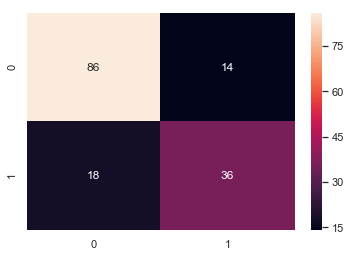

In [41]:
sns.heatmap(pd.DataFrame(cm), annot=True)

In [42]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred_knn))

              precision    recall  f1-score   support

         0.0       0.83      0.86      0.84       100
         1.0       0.72      0.67      0.69        54

    accuracy                           0.79       154
   macro avg       0.77      0.76      0.77       154
weighted avg       0.79      0.79      0.79       154

